In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import samuroi
from samuroi.util.mask_generator import create_masks, manual_correction, ilastik_functions, test_data

%matplotlib inline


In [9]:
# for this example you need to add the directory containing supplementary files
os.chdir('/Users/stephenlenzi/Desktop/supplementary_files/')

# add path to a file called run_ilastik.sh 
# which is in the folder containing your installation of ilastik
ilastik_path = "/Users/stephenlenzi/Downloads/ilastik-1.1.7.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh"

# this is the project file containing the training set of images
ilastik_project_path="./GCaMP.ilp"

('./GCaMP.ilp', '/Users/stephenlenzi/Downloads/ilastik-1.1.7.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh', '/var/folders/5l/07wzdm9d0nn2hw3zjrlyxp040000gn/T/tmpkVfpH8', '/var/folders/5l/07wzdm9d0nn2hw3zjrlyxp040000gn/T/tmp95pbK2.npy')


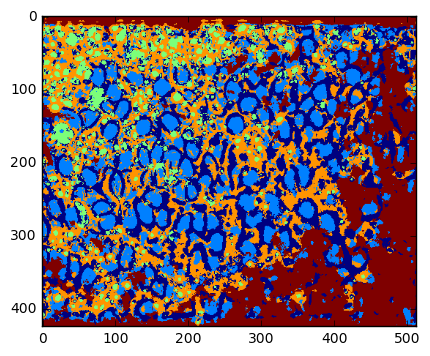

In [11]:
# now for some real data
# load example dataset
data_path = './data.npy'
data = np.load(data_path)

# create a sum image
sum_image = np.sum(data, axis=2)

# create segmentation using ilastik
segmentation_image = ilastik_functions.ilastik_segment(sum_image, ilastik_path, ilastik_project_path=ilastik_project_path)
plt.imshow(segmentation_image)


In [12]:
# choose your target layer (outer)
putative_somata = segmentation_image==1
# choose your nuclei layer
putative_nuclei = segmentation_image==2
# run the mask generator
real_roi_mask_obj = create_masks.DonutCells(sum_image, putative_nuclei, putative_somata)

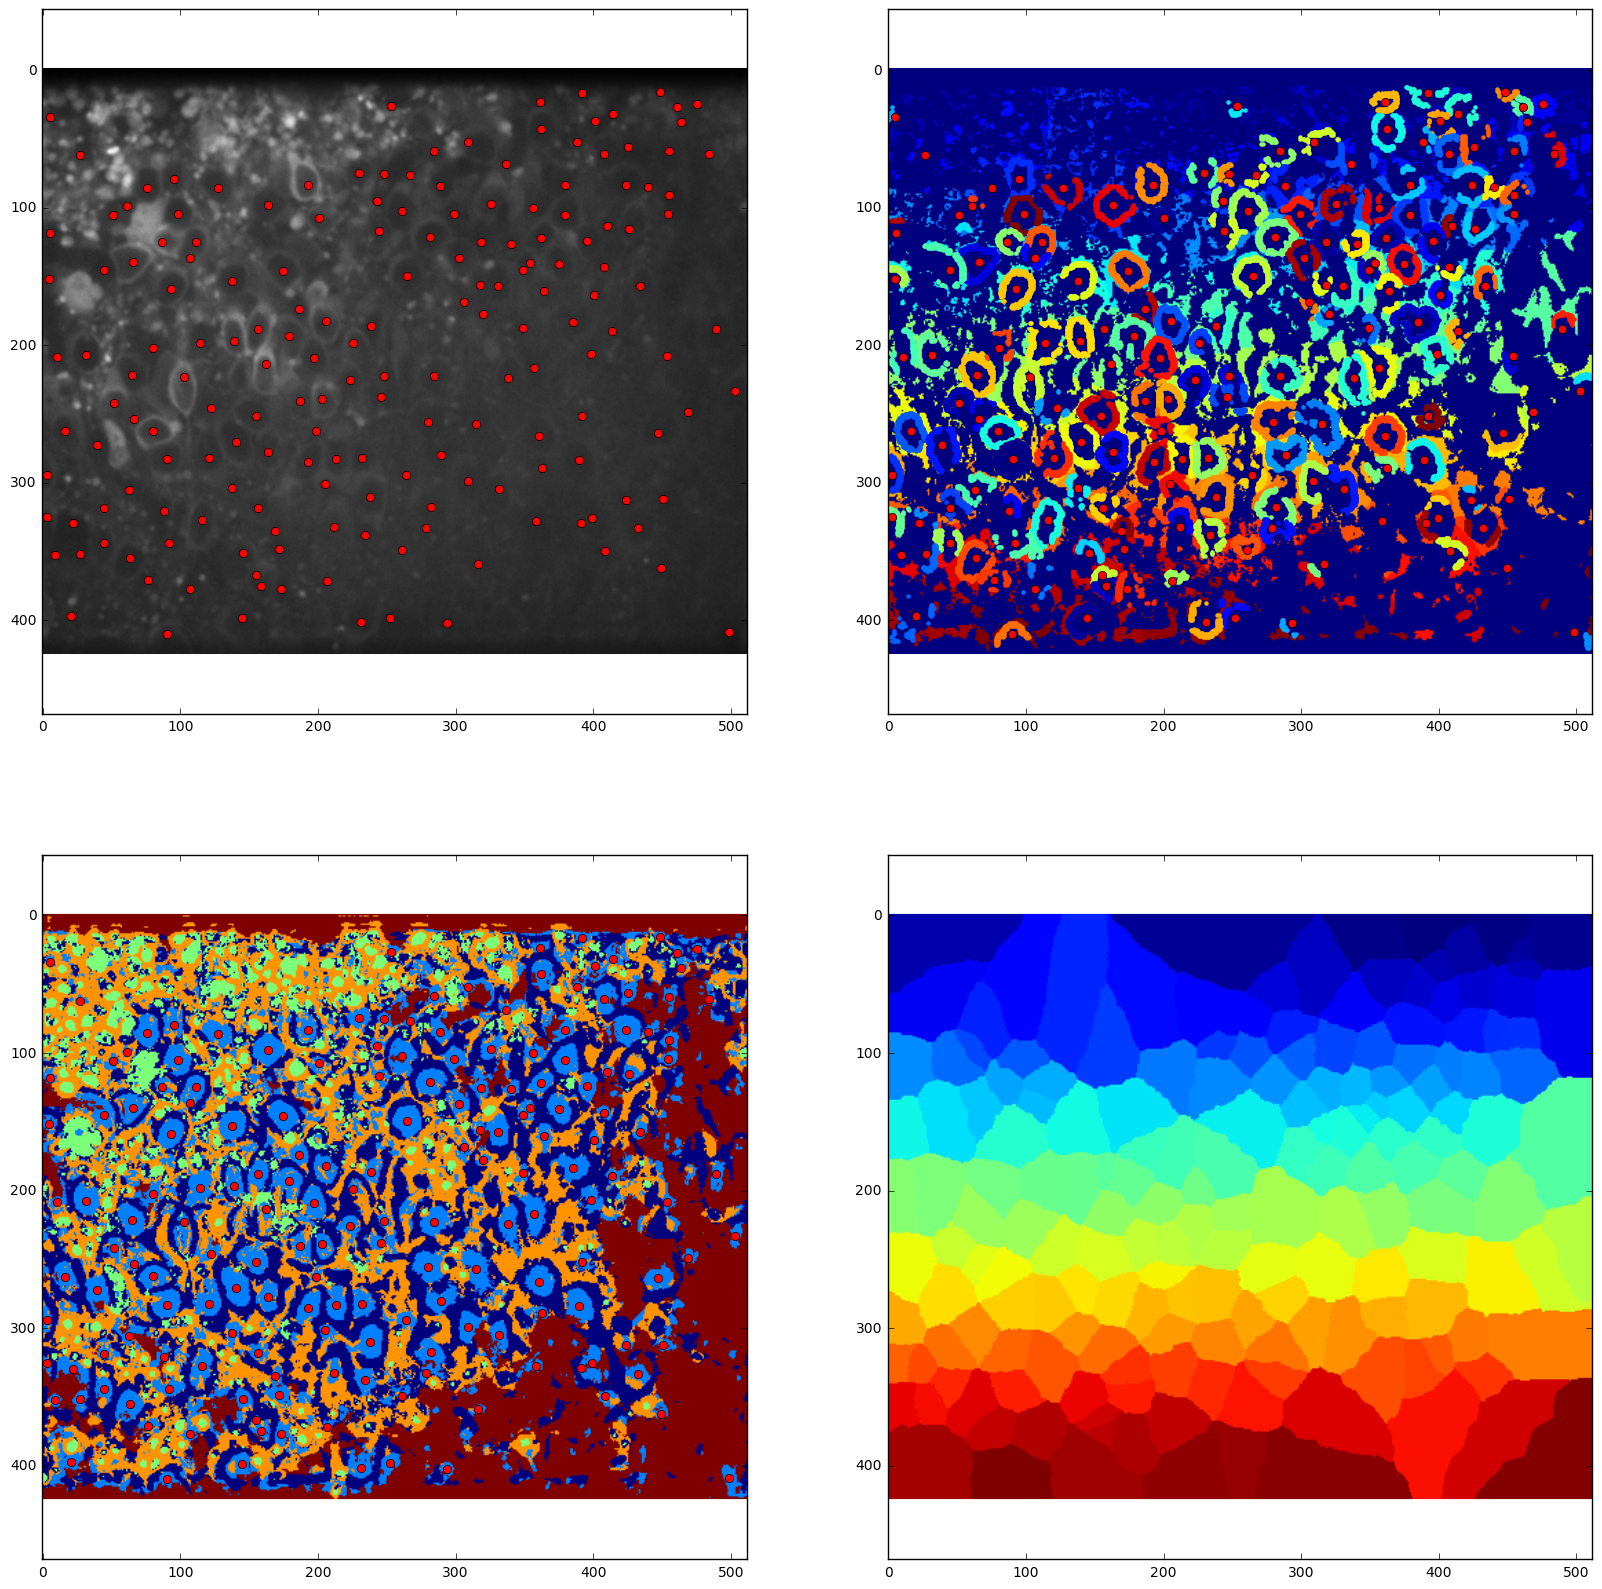

In [13]:
# run the manual correction
manual_correction.ComCorrector(real_roi_mask_obj, sum_image, real_roi_mask_obj.putative_somata_image*real_roi_mask_obj.segmentation_labels,segmentation_image)

In [14]:
# when you are ready to view the masks in SamuROI

import samuroi
from samuroi.masks.segmentation import Segmentation

# add each roi_mask to an image for SAMUROI segmentation conversion

segmask = np.zeros_like(sum_image)
for i,m in enumerate(real_roi_mask_obj.roi_masks):
    segmask[m[:,0],m[:,1]] = i+1

seg = Segmentation(segmask) # convert to a SAMUROI segmentation

samuroi.SamuROIData(data)  # create SAMUROI data object

window = samuroi.SamuROIWindow(data, morphology=sum_image.astype(float))
window.segmentation.masks.add(seg)
window.show()